 Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [6]:
gld_data = pd.read_csv("gld_price_data.csv")

In [7]:
gld_data.head(6)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520,1.466405


In [8]:
gld_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gld_data.shape

(2290, 6)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


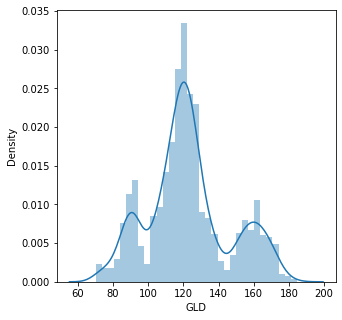

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.distplot(gld_data["GLD"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


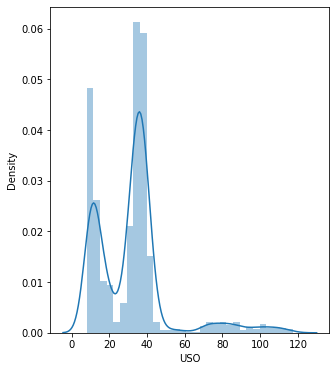

In [14]:
plt.figure(figsize=(5,))
sns.distplot(gld_data["USO"])
plt.show()

In [15]:
gld_data["GLD"].value_counts()

115.940002    5
117.959999    4
122.209999    4
126.300003    4
124.589996    4
             ..
147.179993    1
146.240005    1
145.729996    1
148.339996    1
122.543800    1
Name: GLD, Length: 1930, dtype: int64

In [17]:
x = gld_data.drop(columns=["GLD","Date"],axis=1)
y = gld_data["GLD"]

In [19]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the Dataset

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape,x_test.shape,x.shape)

(1832, 4) (458, 4) (2290, 4)


XGBRegressor

In [26]:
regrossor=XGBRegressor()
regrossor.fit(x_train,y_train)

[16:50:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [27]:
training_predication = regrossor.predict(x_train)
r2_train = r2_score(y_train,training_predication)
print("the error of training data is :",r2_train)

the error of training data is : 0.9861754954225445


In [28]:
test_predication = regrossor.predict(x_test)
r2_test = r2_score(y_test,test_predication)
print("the error of test is :",r2_test)


the error of test is : 0.9768545049270835


 Random Forest Regressor

In [31]:
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape,x_test.shape,x.shape)

(1832, 4) (458, 4) (2290, 4)


In [34]:
test_pridication=regressor.predict(x_test)
test_pridication

array([168.82579958,  82.01190007, 116.05420042, 127.59870086,
       120.70360142, 154.86809783, 150.09249799, 126.27329995,
       117.58599882, 126.05330083, 116.71130113, 171.09650098,
       141.7417995 , 168.17869826, 115.04280014, 117.75260055,
       138.15250243, 170.51260138, 159.31080227, 162.02269978,
       154.97479987, 125.10469994, 175.53919948, 156.98920412,
       125.25630034,  93.97319982,  77.98230023, 120.47249976,
       119.14189948, 167.53949966,  88.13320085, 125.23259998,
        91.08550088, 117.71330032, 121.18429909, 136.57500113,
       115.49440124, 115.15180044, 147.7638997 , 107.69300077,
       104.6484025 ,  87.32489772, 126.32930086, 117.80020017,
       151.79449876, 119.67599969, 108.27770052, 108.02399767,
        93.04720033, 127.12749789,  75.09860036, 113.6302993 ,
       121.25660018, 111.39729935, 118.7454989 , 120.71389917,
       159.29260044, 167.30110133, 147.06959669,  86.0640989 ,
        94.44930021,  86.78939885,  90.65519991, 118.97

In [38]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [39]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),x,y,cv=cv)

array([0.99007168, 0.99224406, 0.98875725, 0.99290476, 0.98964005])